In [1]:
attributes_list = ['upperBodyLogo', 'lowerBodyThinStripes', 'upperBodyThinStripes', 'upperBodyThickStripes', 'accessoryHeadphone', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'carryingFolder', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'carryingLuggageCase', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStocking', 'upperBodySuit', 'carryingSuitcase', 'lowerBodySuits', 'accessorySunglasses', 'upperBodySweater', 'lowerBodyTrousers', 'upperBodyTshirt', 'upperBodyOther', 'upperBodyVNeck', 'personalLess15', 'personalLess30', 'personalLess45', 'personalLess60', 'personalLarger60', 'lowerBodyCapri', 'lowerBodyCasual', 'upperBodyCasual', 'personalFemale', 'lowerBodyFormal', 'upperBodyFormal', 'lowerBodyPlaid', 'personalMale', 'upperBodyPlaid']
print(attributes_list)

['upperBodyLogo', 'lowerBodyThinStripes', 'upperBodyThinStripes', 'upperBodyThickStripes', 'accessoryHeadphone', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'carryingFolder', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'carryingLuggageCase', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStocking', 'upperBodySuit', 'carryingSuitcase', 'lowerBodySuits', 'accessorySunglasses', 'upperBodySweater', 'lowerBodyTrousers', 'upperBodyTshirt', 'upperBodyOther', 'upperBodyVNeck', 'personalLess15', 'personalLess30', 'personalLess45', 'personal

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
import cv2
from cv2 import *
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy.misc import toimage
import sys
sys.path.append("..")
from src.network.GoogleLenet import GoogLeNet
from src.network.hiarBayesGoogLenet_gap import hiarBayesGoogLeNet
from src.network.partGoogLeNet import partGoogLeNet

low_level = [27, 32, 50, 56]#, 61, 62, 63, 64
mid_level = [0, 6, 7, 8, 9, 11, 12, 13, 17, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60]
high_level = [1, 2, 3, 4, 5, 10, 14, 15, 16, 18, 19, 31, 34, 40]

head_level = [0,8,20,21,25,28,36,37,44,54]
upperbody_level = [7,15,17,19,23,27,30,39,40,46,50,51,55,56,58,59,60]
lowerbody_level = [6,10,11,12,13,14,18,22,24,29,31,32,33,35,38,41,45,47,52,53,57]
foot_level = [9,26,42,43,48,49]
global_level = [1,2,3,4,5,16,34]

image_width = 75
image_height = 160
#model_h = hiarGoogLeNet.build(image_height, image_width, 3, [len(low_level), len(mid_level), len(high_level)])
#model_h.load_weights("/home/anhaoran/codes/pedestrian_attibutes_wpal/models/imagenet_models/hiarGoogLeNet_RAP/binary51_epoch50_valloss0.21.hdf5")
#model_g = GoogLeNet.build(image_height, image_width, 3, 51)
#model_g.load_weights("../models/imagenet_models/GoogLeNet_RAP/binary51_epoch50_valloss0.54.hdf5")
model_gh = hiarBayesGoogLeNet.build(image_height, image_width, 3, [len(low_level), len(mid_level), len(high_level)])
model_gh.load_weights("../models/imagenet_models/hiarBayesGoogLeNet_PETA/binary61_gap&dense_final500iter_model.h5")
model_gh.summary()
model_p = partGoogLeNet.build(image_height, image_width, 3, [head_level, upperbody_level, lowerbody_level, foot_level, global_level])
model_p.load_weights("../models/imagenet_models/partGoogLeNet_PETA/binary61__final50iter_model.h5")
model_p.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 75, 3)   0                                            
__________________________________________________________________________________________________
conv1_7x7_s2 (Conv2D)           (None, 80, 38, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
conv1_7x7_s2_bn (BatchNormaliza (None, 80, 38, 64)   256         conv1_7x7_s2[0][0]               
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 40, 19, 64)   0           conv1_7x7_s2_bn[0][0]            
__________________________________________________________________________________________________
conv2_3x3 

ImageNet...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 160, 75, 3)   0                                            
__________________________________________________________________________________________________
conv1_7x7_s2 (Conv2D)           (None, 80, 38, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
conv1_7x7_s2_bn (BatchNormaliza (None, 80, 38, 64)   256         conv1_7x7_s2[0][0]               
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 40, 19, 64)   0           conv1_7x7_s2_bn[0][0]            
_________________________________________________________________________________________________

In [4]:
model_gap_low = Model(inputs=model_gh.input, outputs=model_gh.get_layer('conv1_e').output)
model_gap_mid = Model(inputs=model_gh.input, outputs=model_gh.get_layer('conv2_e').output)
model_gap_hig = Model(inputs=model_gh.input, outputs=model_gh.get_layer('conv3_e').output)
#model_gap_hig.summary()
model_gap_part = Model(inputs=model_p.input, outputs=model_p.get_layer('concatenate_20').output)

In [15]:
cam_low_weights = model_gh.get_layer('low').get_weights()
print(cam_low_weights[0].shape)
cam_mid_weights = model_gh.get_layer('middle').get_weights()
print(cam_mid_weights[0].shape)
cam_hig_weights = model_gh.get_layer('high').get_weights()
print(cam_hig_weights[0].shape)
print("-----------")
cam_head_weights = model_p.get_layer('dense_0').get_weights()
print(cam_head_weights[0].shape)
cam_lowerbody_weights = model_p.get_layer('dense_1').get_weights()
print(cam_lowerbody_weights[0].shape)
cam_upperbody_weights = model_p.get_layer('dense_2').get_weights()
print(cam_upperbody_weights[0].shape)
cam_foot_weights = model_p.get_layer('dense_3').get_weights()
print(cam_foot_weights[0].shape)
cam_global_weights = model_p.get_layer('dense_4').get_weights()
print(cam_global_weights[0].shape)

(512, 4)
(512, 43)
(1024, 14)
-----------
(1024, 10)
(1024, 17)
(1024, 21)
(1024, 6)
(1024, 7)


(1, 160, 75, 3)
upperBodyLogo :  False
lowerBodyThinStripes :  False
upperBodyThinStripes :  False
upperBodyThickStripes :  False
accessoryHeadphone :  False
carryingBabyBuggy :  False
carryingBackpack :  False
hairBald :  False
footwearBoots :  False
carryingOther :  False
carryingShoppingTro :  False
carryingUmbrella :  False
carryingFolder :  False
accessoryHairBand :  False
accessoryHat :  False
lowerBodyHotPants :  False
upperBodyJacket :  False
lowerBodyJeans :  False
accessoryKerchief :  False
footwearLeatherShoes :  False
hairLong :  False
lowerBodyLongSkirt :  False
upperBodyLongSleeve :  True
carryingLuggageCase :  False
carryingMessengerBag :  False
accessoryMuffler :  False
accessoryNothing :  True
carryingNothing :  False
upperBodyNoSleeve :  False
carryingPlasticBags :  False
footwearSandals :  False
footwearShoes :  True
hairShort :  True
lowerBodyShorts :  False
upperBodyShortSleeve :  False
lowerBodyShortSkirt :  False
footwearSneakers :  False
footwearStocking :  Fals

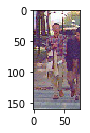

In [5]:
def load_original(img_path, img_height, img_width):
    # 把原始图片压缩为 299*299大小
    img = image.load_img(img_path, target_size=(image_height, image_width, 3))
    plt.figure(0)
    plt.subplot(211)
    plt.imshow(img)
    return img

img_path = '/home/anhaoran/data/pedestrian_attributes_PETA/PETA/MIT/archive/00044_male_fore.jpg'
img = load_original(img_path, image_height, image_width)
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)
print(img_arr.shape)

predictions = model_gh.predict(img_arr)
for i in range(len(predictions[0])):
    print(attributes_list[i], ": ", predictions[0, i]>=0.5)

In [6]:
feature_map_low = model_gap_low.predict(img_arr)
print(feature_map_low.shape)
feature_map_mid = model_gap_mid.predict(img_arr)
print(feature_map_mid.shape)
feature_map_hig = model_gap_hig.predict(img_arr)
print(feature_map_hig.shape)
feature_map_part = model_gap_part.predict(img_arr)
print(feature_map_part.shape)

(1, 10, 5, 512)
(1, 10, 5, 512)
(1, 5, 3, 1024)
(1, 5, 3, 1024)


# Low_level attributes

In [104]:
idx = 1
count = 1
print(attributes_list[idx], ": ", predictions[0, idx])

lowerBodyThinStripes :  5.239796e-26


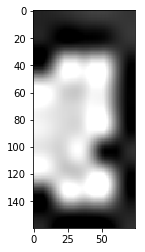

In [105]:
from PIL import Image

array_feature_map_low = np.zeros(dtype=np.float32, shape=feature_map_low.shape[1:3])
for i in range(0, 512):
    array_feature_map_low += cam_low_weights[0][i, idx] * feature_map_low[0, :, :, i]#
    
array_feature_map_low -= np.average(array_feature_map_low)
img_feature_map_low = Image.fromarray(array_feature_map_low.astype('uint8'))
img_feature_map_low = img_feature_map_low.resize((image_width, image_height), Image.ANTIALIAS)
#array_feature_map_mid = image.img_to_array(img_feature_map_mid)
#img_feature_map_mid = cv2.applyColorMap(np.uint8(array_feature_map_mid), cv2.COLORMAP_JET)
plt.imshow(img_feature_map_low)

(12000, 1)
(12000,)
[[0.83633067]
 [0.16799176]
 [0.96536607]
 [0.3720126 ]
 [0.60166912]
 [0.03075414]]


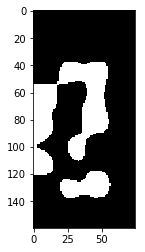

In [106]:
from sklearn.cluster import KMeans

img_data = np.reshape(np.array(img_feature_map_low), (-1, 1))/256.
print(img_data.shape)
kmeans = KMeans(n_clusters=6, random_state=0).fit(img_data)
#print(kmeans.labels_)
print(kmeans.labels_.shape)
print(kmeans.cluster_centers_)

label = kmeans.labels_.reshape([image_height, image_width])
pic_new = Image.new("L", (image_width, image_height))
min_activation = kmeans.cluster_centers_[kmeans.cluster_centers_.reshape((-1,)).argsort()[-count]][0]
for i in range(image_height):
    for j in range(image_width):
        if kmeans.cluster_centers_[label[i][j]][0] >= min_activation:
            pic_new.putpixel((j, i), 255)
plt.imshow(pic_new)
plt.show()

# Mid_level attributes

In [99]:
idx = 46
count = 1
print(attributes_list[idx], ": ", predictions[0, idx])

upperBodyVNeck :  1.3228824e-07


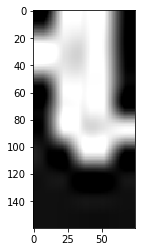

In [100]:
array_feature_map_mid = np.zeros(dtype=np.float32, shape=feature_map_mid.shape[1:3])
for i in range(0, 512):
    array_feature_map_mid += cam_mid_weights[0][i, idx-4] * feature_map_mid[0, :, :, i]#
    
array_feature_map_mid -= np.average(array_feature_map_mid)
img_feature_map_mid = Image.fromarray(array_feature_map_mid.astype('uint8'))
img_feature_map_mid = img_feature_map_mid.resize((image_width, image_height), Image.ANTIALIAS)
#array_feature_map_mid = image.img_to_array(img_feature_map_mid)
#img_feature_map_mid = cv2.applyColorMap(np.uint8(array_feature_map_mid), cv2.COLORMAP_JET)
plt.imshow(img_feature_map_mid)

(12000, 1)
(12000,)
[[0.22871514]
 [0.85859324]
 [0.04306947]
 [0.43160585]
 [0.97915477]
 [0.64512467]]


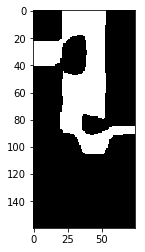

In [101]:
img_data = np.reshape(np.array(img_feature_map_mid), (-1, 1))/256.
print(img_data.shape)
kmeans = KMeans(n_clusters=6, random_state=0).fit(img_data)
#print(kmeans.labels_)
print(kmeans.labels_.shape)
print(kmeans.cluster_centers_)

label = kmeans.labels_.reshape([image_height, image_width])
pic_new = Image.new("L", (image_width, image_height))
min_activation = kmeans.cluster_centers_[kmeans.cluster_centers_.reshape((-1,)).argsort()[-count]][0]
for i in range(image_height):
    for j in range(image_width):
        if kmeans.cluster_centers_[label[i][j]][0] >= min_activation:
            pic_new.putpixel((j, i), 255)
plt.imshow(pic_new)
plt.show()

# High_level attributes

In [112]:
idx = 48
count = 1
print(attributes_list[idx], ": ", predictions[0, idx])

personalLess30 :  0.9025536


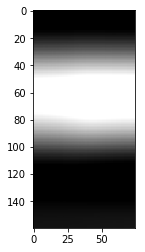

In [113]:
array_feature_map_hig = np.zeros(dtype=np.float32, shape=feature_map_hig.shape[1:3])
for i in range(0, 1024):
    array_feature_map_hig += cam_hig_weights[0][i, idx-48] * feature_map_hig[0, :, :, i]#
    
array_feature_map_hig -= np.average(array_feature_map_hig)
img_feature_map_hig = Image.fromarray(array_feature_map_hig.astype('uint8'))
img_feature_map_hig = img_feature_map_hig.resize((image_width, image_height), Image.ANTIALIAS)
#array_feature_map_mid = image.img_to_array(img_feature_map_mid)
#img_feature_map_mid = cv2.applyColorMap(np.uint8(array_feature_map_mid), cv2.COLORMAP_JET)
plt.imshow(img_feature_map_hig)

(12000, 1)
(12000,)
[[0.582355  ]
 [0.02138666]
 [0.9851919 ]
 [0.38204606]
 [0.78929228]
 [0.192958  ]]


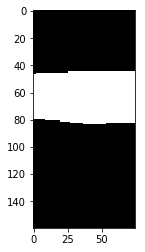

In [114]:
img_data = np.reshape(np.array(img_feature_map_hig), (-1, 1))/256.
print(img_data.shape)
kmeans = KMeans(n_clusters=6, random_state=0).fit(img_data)
#print(kmeans.labels_)
print(kmeans.labels_.shape)
print(kmeans.cluster_centers_)

label = kmeans.labels_.reshape([image_height, image_width])
pic_new = Image.new("L", (image_width, image_height))
min_activation = kmeans.cluster_centers_[kmeans.cluster_centers_.reshape((-1,)).argsort()[-count]][0]
for i in range(image_height):
    for j in range(image_width):
        if kmeans.cluster_centers_[label[i][j]][0] >= min_activation:
            pic_new.putpixel((j, i), 255)
plt.imshow(pic_new)
plt.show()